## Step 1
After importing the data set from the Western Pennsylvania Data Collection Center, the data has been cleaned by removing all entries with missing key infromation. This is done using the notna() function.

In [2]:
import pandas as pd

#import dataset
pittFireData = pd.read_csv("Pittsburgh_Fire_Data.csv", sep=",")

# get rid of unknown area data
pittFireData = pittFireData[pittFireData['neighborhood'].notna()]
pittFireData.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240


## Step 2
Now that the data has been cleaned we can summerize the data. There are many ways to do this but I have chosen to sort the data based on the number of fires within a given neighborhood. This can be done by using query masks and counting the number of rows in the selection.

In [3]:
import geopandas
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
rows = []
for area in pittFireData['neighborhood'].unique():
    query_mask = pittFireData['neighborhood'] == area
    selection = pittFireData[query_mask]
    rows.append([area, selection.shape[0]])

    
fireDataSummary = pd.DataFrame(rows, columns=["neighborhood","number_of_incidents"])
fireDataSummary

,neighborhood,number_of_incidents
0,Fineview,45
1,Fairywood,23
2,South Side Flats,220
3,Allegheny Center,53
4,Lincoln-Lemington-Belmar,173
...,...,...
86,Arlington Heights,12
87,South Shore,21
88,Oakwood,13
89,Chartiers City,14


## Step 3
Using GeoPandas and Neighborhood data given in lab 9, We are able to summarize the data on a visual map. We can take the geometric data and neighborhood names from the neighborhood data and combine it with the fire summary data based on the neighborhood name. We can then create a heat map based on the number of fires in a specific area.

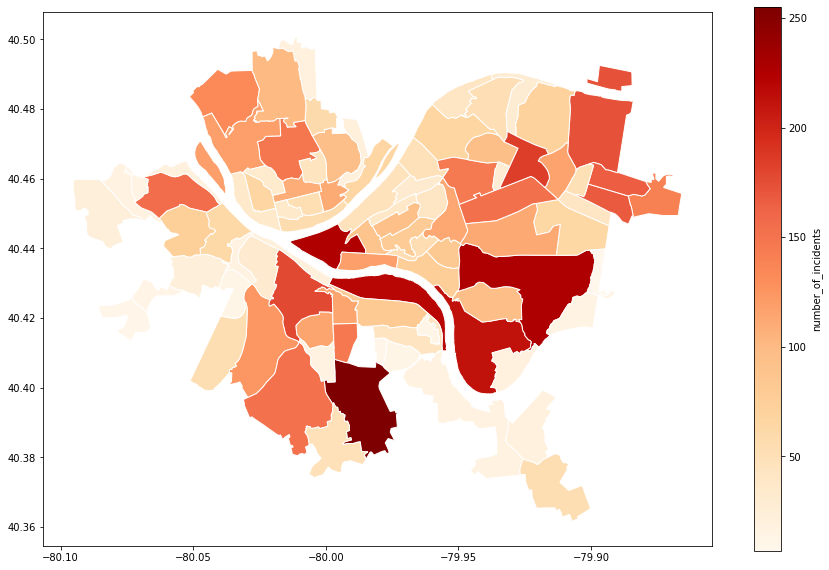

In [4]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fire_map = neighborhoods.merge(fireDataSummary, how='left', left_on='hood', right_on='neighborhood') # merge with fire data
# geoFireDataSummary = geopandas.GeoDataFrame(fireDataSummary, geometry=geometry)
# geoFireDataSummary = geopandas.GeoDataFrame(fireDataSummary, geometry=geopandas.points_from_xy(fireDataSummary.longitude, fireDataSummary.latitude))
fire_map
# fire_map = geoFireDataSummary.sjoin(neighborhoods, how="inner", predicate='intersects')
fire_map.plot(column='number_of_incidents', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "number_of_incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               )

## Step 4
We can now narrow our selection by selecting all areas that have incidents less than 20. This will help us to see which areas we should avoid when selecting the best neighborhood and help to make conculsions about which areas are better than others.

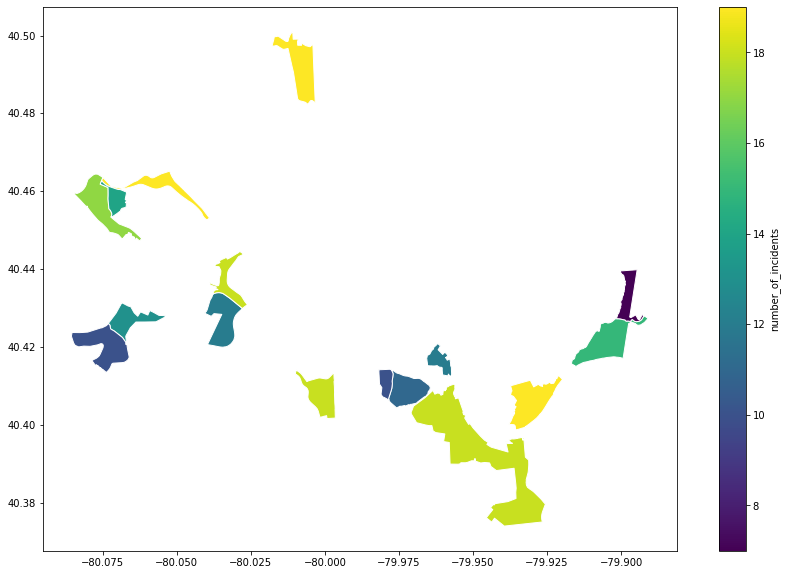

In [5]:
import pandas as pd
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
fireDataSummary.loc[(fireDataSummary['number_of_incidents'] < 20)]

fire_map = neighborhoods.merge(fireDataSummary.loc[(fireDataSummary['number_of_incidents'] < 20)], how='left', left_on='hood', right_on='neighborhood') # merge with fire data
fire_map
fire_map = fire_map[fire_map['neighborhood'].notna()]
fire_map.plot(column='number_of_incidents', # set the data to be used for coloring
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "number_of_incidents"}, # label the legend
               figsize=(15, 10), # set the size
               )


# Step 5 
We can now simply sort the data to find the area with the lowest fire risk.

In [6]:
fireDataSorted = fireDataSummary.sort_values(by='number_of_incidents')
fireDataSorted

,neighborhood,number_of_incidents
83,Mount Oliver Borough,6
61,Regent Square,7
90,Mt. Oliver,10
85,East Carnegie,10
84,St. Clair,11
...,...,...
37,Hazelwood,213
2,South Side Flats,220
25,Central Business District,225
11,Squirrel Hill South,226


## Conclusion
By looking at the fire map we can see that most of the highest cases are located in the center of the city. These are areas that you should avoid. This is further supported by the reduced fire data map showing that the areas with the lowest cases are far from the City. Overall it seems that Mount Oliver Borough has the lowest cases but any of the top 5 areas all have less than 11 fires. Any of these locations would be good to live in: Mount Oliver Borough, Regent Square, Mt. Oliver, East Carnegie, St. Clair